In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glhmm.glhmm as glhmm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data_tmp = pd.read_csv('docs/notebooks/example_data/data.csv', header=None)
T_t_tmp = pd.read_csv('docs/notebooks/example_data/T.csv', header=None)
data = data_tmp.to_numpy()
T_t = T_t_tmp.to_numpy()

In [3]:
hmm = glhmm.glhmm(model_beta='no', K=4, covtype='full')
hmm.train(X=None, Y=data, indices=T_t)

Init repetition 1 free energy = 1380462.4759101232
Init repetition 2 free energy = 1380058.961175246
Init repetition 3 free energy = 1379812.9122504436
Init repetition 4 free energy = 1378710.2765944498
Init repetition 5 free energy = 1379041.207865964
Best repetition: 4
Cycle 1 free energy = 1378587.3494904912
Cycle 2 free energy = 1378017.2112643216
Cycle 3, free energy = 1377690.2239695515, relative change = 0.36448332717987064
Cycle 4, free energy = 1377439.1311848524, relative change = 0.21868035326206425
Cycle 5, free energy = 1377235.9157633255, relative change = 0.15037024564506202
Cycle 6, free energy = 1377046.6417141054, relative change = 0.12284876608083198
Cycle 7, free energy = 1376878.0550111074, relative change = 0.09862940823327246
Cycle 8, free energy = 1376736.648170056, relative change = 0.07640716494331473
Cycle 9, free energy = 1376588.5689962837, relative change = 0.07408476028333164
Cycle 10, free energy = 1376432.12704202, relative change = 0.07258738158313442


(array([[9.77108763e-01, 9.55651091e-04, 5.75108357e-03, 1.61845025e-02],
        [9.87796677e-01, 4.50957761e-05, 3.64991735e-03, 8.50831030e-03],
        [9.94011514e-01, 5.79869480e-04, 9.60708139e-04, 4.44790881e-03],
        ...,
        [9.97011566e-01, 1.27513938e-08, 1.23004534e-03, 1.75837640e-03],
        [8.53255371e-01, 6.26990826e-06, 9.13408932e-02, 5.53974664e-02],
        [7.49666601e-01, 1.93642185e-03, 1.78985568e-01, 6.94114089e-02]]),
 array([[[9.75427610e-01, 1.78752746e-05, 9.93884662e-04, 6.69393199e-04],
         [8.65821954e-04, 2.07134858e-05, 3.83059487e-05, 3.08097022e-05],
         [3.32193543e-03, 6.85886955e-07, 2.40501278e-03, 2.34494794e-05],
         [8.18130950e-03, 5.82112872e-06, 2.12713962e-04, 7.78465792e-03]],
 
        [[9.86440947e-01, 4.64069831e-04, 2.93942734e-04, 5.97716555e-04],
         [2.71904605e-05, 1.66992023e-05, 3.51807331e-07, 8.54305912e-07],
         [2.98376116e-03, 1.58153927e-05, 6.31743746e-04, 1.85970482e-05],
         [4.5

In [4]:
K = hmm.hyperparameters["K"] # the number of states
q = data.shape[1] # the number of parcels/channels
TP = np.zeros(shape=(K, K))
TP = hmm.P # the transition probability matrix
state_means = np.zeros(shape=(q, K))
state_means = hmm.get_means() # the state means in the shape (no. features, no. states)
state_FC = np.zeros(shape=(q, q, K))
for k in range(K):
    state_FC[:,:,k] = hmm.get_covariance_matrix(k=k) # the state covariance matrices in the shape (no. features, no. features, no. states)

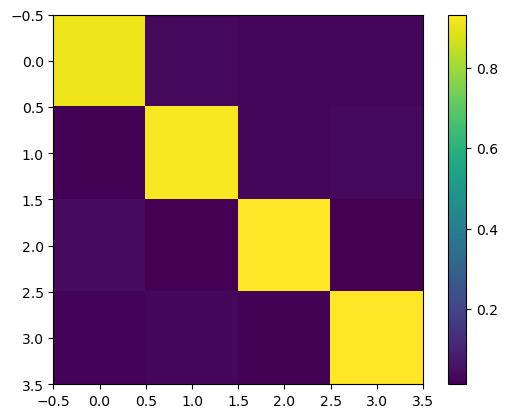

In [5]:
plt.imshow(TP)
plt.colorbar()
plt.show()

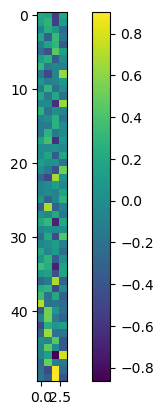

In [6]:
plt.imshow(state_means)
plt.colorbar()
plt.show()

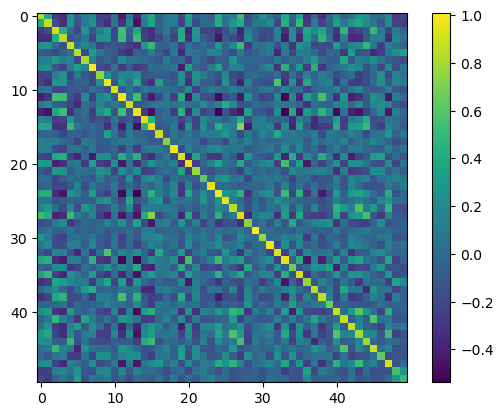

In [7]:
plt.imshow(state_FC[:,:,0])
plt.colorbar()
plt.show()